In [1]:
import torch
import torchvision
from PIL import Image
import numpy as np
from pylab import *


In [2]:
model = torchvision.models.resnet18(pretrained=True)
for p in model.parameters():
    p.requires_grad=False

In [ ]:
lr = 0.01
x = Image.open('img.jpg')
x = torch.tensor(np.array(x,'float32')/255-0.5)
#x /= 255
x = x[:224,:224,:]
x = torch.permute(x,[2,0,1])
x = x[None,:,:,:]
x0 = x.detach()
model.eval()
vals = []
x.requires_grad = True
for i in range(400):
    x.requires_grad = True    
    y = model(x)
    loss = -torch.mean(y[:,283]) + 0.01*torch.mean((x-x0)**2)
    loss.backward()
    vals += [loss.item()]
    grad = x.grad[:,:,:,:]
    with torch.no_grad():
        x = x - grad*lr
        #x = torch.clip(x,-0.5,0.5)
    #if i % 10==0:
       # print(vals[-1])

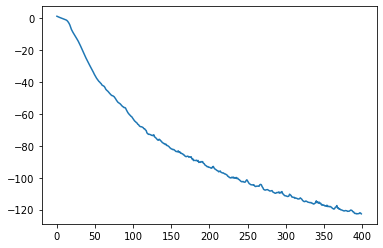

In [5]:
plot(vals)

In [6]:
print('output_class',int(model(x).argmax()))

tensor(283)

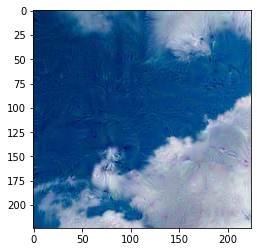

In [8]:
x = torch.permute(x[0],[1,2,0])
x = x.numpy()+0.5
x = np.clip(x,0,1)
imshow(x)